# Machine Learning with Scikit-Learn Crash Course

**Date:** January 2026

This notebook provides a comprehensive overview of machine learning concepts using scikit-learn, designed for data science assessment preparation.

## Table of Contents
1. [Setup and Imports](#1-setup-and-imports)
2. [Train/Test Split and Cross-Validation](#2-traintestsplit-and-cross-validation)
3. [Classification Algorithms](#3-classification-algorithms)
4. [Regression Algorithms](#4-regression-algorithms)
5. [Model Evaluation Metrics](#5-model-evaluation-metrics)
6. [Confusion Matrix Interpretation](#6-confusion-matrix-interpretation)
7. [Feature Scaling](#7-feature-scaling)
8. [Feature Selection Techniques](#8-feature-selection-techniques)
9. [Hyperparameter Tuning](#9-hyperparameter-tuning)
10. [Pipelines in Scikit-Learn](#10-pipelines-in-scikit-learn)
11. [Handling Imbalanced Datasets](#11-handling-imbalanced-datasets)
12. [Overfitting and Underfitting](#12-overfitting-and-underfitting)
13. [Practice Questions](#13-practice-questions)

## 1. Setup and Imports

First, let's import all the necessary libraries we'll use throughout this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Dict, Any

# Datasets
from sklearn.datasets import load_iris, load_breast_cancer, load_diabetes, make_classification

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Classification Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report,
    mean_squared_error, mean_absolute_error, r2_score
)

# Pipeline
from sklearn.pipeline import Pipeline

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("All imports successful!")

All imports successful!


## 2. Train/Test Split and Cross-Validation

### Why Split Data?
We split data to evaluate how well our model generalises to unseen data. Training on all data and testing on the same data leads to overfitting.

### Train/Test Split
The simplest approach: divide data into training set (typically 70-80%) and test set (20-30%).

In [2]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target  # type: ignore[union-attr]

print(f"Dataset shape: {X.shape}")
print(f"Feature names: {iris.feature_names}")  # type: ignore[union-attr]
print(f"Target names: {iris.target_names}")  # type: ignore[union-attr]

Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
def split_data(
    X: np.ndarray,
    y: np.ndarray,
    test_size: float = 0.2,
    random_state: int = 42
) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Split data into training and testing sets.
    
    Args:
        X: Feature matrix.
        y: Target vector.
        test_size: Proportion of data for testing.
        random_state: Random seed for reproducibility.
    
    Returns:
        Tuple of (X_train, X_test, y_train, y_test).
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)  # type: ignore[return-value]


X_train, X_test, y_train, y_test = split_data(X, y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Test set class distribution: {np.bincount(y_test)}")

Training set size: 120
Test set size: 30
Training set class distribution: [40 40 40]
Test set class distribution: [10 10 10]


### Cross-Validation

Cross-validation provides a more robust estimate of model performance by training and evaluating on multiple subsets of the data.

**K-Fold Cross-Validation:**
- Splits data into K equal parts (folds)
- Trains on K-1 folds, tests on remaining fold
- Repeats K times, each fold serving as test set once
- Final score is average of all K iterations

In [4]:
def perform_cross_validation(
    model: Any,
    X: np.ndarray,
    y: np.ndarray,
    cv: int = 5,
    scoring: str = 'accuracy'
) -> Tuple[np.ndarray, float, float]:
    """Perform k-fold cross-validation.
    
    Args:
        model: Scikit-learn estimator.
        X: Feature matrix.
        y: Target vector.
        cv: Number of folds.
        scoring: Scoring metric.
    
    Returns:
        Tuple of (scores array, mean score, standard deviation).
    """
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return scores, scores.mean(), scores.std()


# Example with Logistic Regression
model = LogisticRegression(max_iter=1000)
scores, mean_score, std_score = perform_cross_validation(model, X, y)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {mean_score:.4f} (+/- {std_score:.4f})")

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean accuracy: 0.9733 (+/- 0.0249)


In [5]:
# Stratified K-Fold (maintains class distribution in each fold)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_scores = []
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_fold, y_train_fold)
    score = model.score(X_val_fold, y_val_fold)
    fold_scores.append(score)
    print(f"Fold {fold}: Accuracy = {score:.4f}")

print(f"\nMean accuracy: {np.mean(fold_scores):.4f}")

Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 0.9667
Fold 3: Accuracy = 0.9333
Fold 4: Accuracy = 1.0000
Fold 5: Accuracy = 0.9333

Mean accuracy: 0.9667


## 3. Classification Algorithms

Classification predicts discrete class labels. Let's explore the main algorithms using the Iris dataset.

### 3.1 K-Nearest Neighbours (KNN)

KNN classifies a sample based on the majority class of its K nearest neighbours.

**Key Hyperparameters:**
- `n_neighbors`: Number of neighbours to consider
- `weights`: 'uniform' (all neighbours equal) or 'distance' (closer neighbours weighted more)
- `metric`: Distance metric (euclidean, manhattan, etc.)

In [6]:
def train_knn(
    X_train: np.ndarray,
    y_train: np.ndarray,
    n_neighbors: int = 5,
    weights: str = 'uniform'
) -> KNeighborsClassifier:
    """Train a K-Nearest Neighbours classifier.
    
    Args:
        X_train: Training features.
        y_train: Training labels.
        n_neighbors: Number of neighbours.
        weights: Weight function for prediction.
    
    Returns:
        Trained KNN classifier.
    """
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    return knn


# Scale features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = train_knn(X_train_scaled, y_train, n_neighbors=5)
y_pred_knn = knn.predict(X_test_scaled)

print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

KNN Accuracy: 0.9333


### 3.2 Logistic Regression

Despite its name, Logistic Regression is used for classification. It models the probability of class membership using the logistic function.

**Key Hyperparameters:**
- `C`: Inverse regularisation strength (smaller = stronger regularisation)
- `penalty`: Regularisation type ('l1', 'l2', 'elasticnet')
- `solver`: Optimisation algorithm

In [7]:
def train_logistic_regression(
    X_train: np.ndarray,
    y_train: np.ndarray,
    C: float = 1.0,
    max_iter: int = 1000
) -> LogisticRegression:
    """Train a Logistic Regression classifier.
    
    Args:
        X_train: Training features.
        y_train: Training labels.
        C: Inverse regularisation strength.
        max_iter: Maximum iterations for solver.
    
    Returns:
        Trained Logistic Regression classifier.
    """
    lr = LogisticRegression(C=C, max_iter=max_iter, random_state=42)
    lr.fit(X_train, y_train)
    return lr


lr = train_logistic_regression(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"\nCoefficients shape: {lr.coef_.shape}")

Logistic Regression Accuracy: 0.9333

Coefficients shape: (3, 4)


### 3.3 Decision Trees

Decision Trees make predictions by learning decision rules from features. They're interpretable but prone to overfitting.

**Key Hyperparameters:**
- `max_depth`: Maximum tree depth
- `min_samples_split`: Minimum samples to split a node
- `min_samples_leaf`: Minimum samples in a leaf node
- `criterion`: Split quality measure ('gini', 'entropy')

In [8]:
def train_decision_tree(
    X_train: np.ndarray,
    y_train: np.ndarray,
    max_depth: int | None = None,
    min_samples_split: int = 2
) -> DecisionTreeClassifier:
    """Train a Decision Tree classifier.
    
    Args:
        X_train: Training features.
        y_train: Training labels.
        max_depth: Maximum depth of tree.
        min_samples_split: Minimum samples to split.
    
    Returns:
        Trained Decision Tree classifier.
    """
    dt = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    dt.fit(X_train, y_train)
    return dt


dt = train_decision_tree(X_train, y_train, max_depth=5)
y_pred_dt = dt.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Feature importances: {dict(zip(iris.feature_names, dt.feature_importances_.round(3)))}")  # type: ignore[union-attr]

Decision Tree Accuracy: 0.9333
Feature importances: {'sepal length (cm)': np.float64(0.006), 'sepal width (cm)': np.float64(0.029), 'petal length (cm)': np.float64(0.559), 'petal width (cm)': np.float64(0.406)}


### 3.4 Random Forest

Random Forest is an ensemble of Decision Trees. It reduces overfitting by averaging predictions from multiple trees trained on random subsets.

**Key Hyperparameters:**
- `n_estimators`: Number of trees
- `max_depth`: Maximum depth of each tree
- `max_features`: Number of features to consider for best split

In [9]:
def train_random_forest(
    X_train: np.ndarray,
    y_train: np.ndarray,
    n_estimators: int = 100,
    max_depth: int | None = None
) -> RandomForestClassifier:
    """Train a Random Forest classifier.
    
    Args:
        X_train: Training features.
        y_train: Training labels.
        n_estimators: Number of trees.
        max_depth: Maximum depth of trees.
    
    Returns:
        Trained Random Forest classifier.
    """
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    return rf


rf = train_random_forest(X_train, y_train, n_estimators=100)
y_pred_rf = rf.predict(X_test)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Feature importances: {dict(zip(iris.feature_names, rf.feature_importances_.round(3)))}")  # type: ignore[union-attr]

Random Forest Accuracy: 0.9000
Feature importances: {'sepal length (cm)': np.float64(0.116), 'sepal width (cm)': np.float64(0.015), 'petal length (cm)': np.float64(0.431), 'petal width (cm)': np.float64(0.437)}


### 3.5 Support Vector Machine (SVM)

SVM finds the optimal hyperplane that maximises the margin between classes. It can handle non-linear boundaries using kernel functions.

**Key Hyperparameters:**
- `C`: Regularisation parameter
- `kernel`: Kernel type ('linear', 'rbf', 'poly')
- `gamma`: Kernel coefficient for 'rbf' and 'poly'

In [10]:
def train_svm(
    X_train: np.ndarray,
    y_train: np.ndarray,
    C: float = 1.0,
    kernel: str = 'rbf'
) -> SVC:
    """Train a Support Vector Machine classifier.
    
    Args:
        X_train: Training features.
        y_train: Training labels.
        C: Regularisation parameter.
        kernel: Kernel type.
    
    Returns:
        Trained SVM classifier.
    """
    svm = SVC(C=C, kernel=kernel, random_state=42, probability=True)
    svm.fit(X_train, y_train)
    return svm


svm = train_svm(X_train_scaled, y_train, kernel='rbf')
y_pred_svm = svm.predict(X_test_scaled)

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")

SVM Accuracy: 0.9667


### Comparison of Classification Algorithms

In [11]:
results = {
    'Algorithm': ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ]
}

results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print(results_df.to_string(index=False))

          Algorithm  Accuracy
                SVM  0.966667
                KNN  0.933333
Logistic Regression  0.933333
      Decision Tree  0.933333
      Random Forest  0.900000


## 4. Regression Algorithms

Regression predicts continuous numerical values. Let's use the diabetes dataset.

In [12]:
# Load diabetes dataset
diabetes = load_diabetes()
X_reg, y_reg = diabetes.data, diabetes.target  # type: ignore[union-attr]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Dataset shape: {X_reg.shape}")
print(f"Feature names: {diabetes.feature_names}")  # type: ignore[union-attr]
print(f"Target range: {y_reg.min():.2f} to {y_reg.max():.2f}")

Dataset shape: (442, 10)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target range: 25.00 to 346.00


### 4.1 Linear Regression

Linear Regression fits a linear relationship between features and target: y = w1*x1 + w2*x2 + ... + b

In [13]:
def train_linear_regression(
    X_train: np.ndarray,
    y_train: np.ndarray
) -> LinearRegression:
    """Train a Linear Regression model.
    
    Args:
        X_train: Training features.
        y_train: Training target.
    
    Returns:
        Trained Linear Regression model.
    """
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    return lr


lin_reg = train_linear_regression(X_train_reg, y_train_reg)  # type: ignore[arg-type]
y_pred_lin = lin_reg.predict(X_test_reg)

print(f"Linear Regression R2 Score: {r2_score(y_test_reg, y_pred_lin):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_lin)):.4f}")

Linear Regression R2 Score: 0.4526
RMSE: 53.8534


### 4.2 Ridge Regression (L2 Regularisation)

Ridge adds L2 penalty to prevent overfitting by shrinking coefficients. The penalty term is the sum of squared coefficients.

**Key Hyperparameter:**
- `alpha`: Regularisation strength (higher = more regularisation)

In [14]:
def train_ridge_regression(
    X_train: np.ndarray,
    y_train: np.ndarray,
    alpha: float = 1.0
) -> Ridge:
    """Train a Ridge Regression model.
    
    Args:
        X_train: Training features.
        y_train: Training target.
        alpha: Regularisation strength.
    
    Returns:
        Trained Ridge Regression model.
    """
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    return ridge


ridge = train_ridge_regression(X_train_reg, y_train_reg, alpha=1.0)  # type: ignore[arg-type]
y_pred_ridge = ridge.predict(X_test_reg)

print(f"Ridge Regression R2 Score: {r2_score(y_test_reg, y_pred_ridge):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge)):.4f}")

Ridge Regression R2 Score: 0.4192
RMSE: 55.4745


### 4.3 Lasso Regression (L1 Regularisation)

Lasso adds L1 penalty, which can shrink some coefficients to exactly zero (feature selection). The penalty term is the sum of absolute values of coefficients.

**Key Hyperparameter:**
- `alpha`: Regularisation strength

In [15]:
def train_lasso_regression(
    X_train: np.ndarray,
    y_train: np.ndarray,
    alpha: float = 1.0
) -> Lasso:
    """Train a Lasso Regression model.
    
    Args:
        X_train: Training features.
        y_train: Training target.
        alpha: Regularisation strength.
    
    Returns:
        Trained Lasso Regression model.
    """
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    return lasso


lasso = train_lasso_regression(X_train_reg, y_train_reg, alpha=0.1)  # type: ignore[arg-type]
y_pred_lasso = lasso.predict(X_test_reg)

print(f"Lasso Regression R2 Score: {r2_score(y_test_reg, y_pred_lasso):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_lasso)):.4f}")
print(f"\nNon-zero coefficients: {np.sum(lasso.coef_ != 0)} out of {len(lasso.coef_)}")

Lasso Regression R2 Score: 0.4719
RMSE: 52.8980

Non-zero coefficients: 7 out of 10


### Comparison: Ridge vs Lasso

In [16]:
# Compare coefficients
coef_comparison = pd.DataFrame({
    'Feature': diabetes.feature_names,  # type: ignore[union-attr]
    'Linear': lin_reg.coef_.round(2),
    'Ridge': ridge.coef_.round(2),
    'Lasso': lasso.coef_.round(2)
})
print(coef_comparison.to_string(index=False))

Feature  Linear   Ridge   Lasso
    age   37.90   45.37    0.00
    sex -241.96  -76.67 -152.66
    bmi  542.43  291.34  552.70
     bp  347.70  199.00  303.37
     s1 -931.49   -0.53  -81.37
     s2  518.06  -28.58   -0.00
     s3  163.42 -144.51 -229.26
     s4  275.32  119.26    0.00
     s5  736.20  230.22  447.92
     s6   48.67  112.15   29.64


## 5. Model Evaluation Metrics

### Classification Metrics

In [17]:
# Use breast cancer dataset for binary classification metrics
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target  # type: ignore[union-attr]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Train a model
scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_c_scaled, y_train_c)
y_pred_c = clf.predict(X_test_c_scaled)
y_prob_c = clf.predict_proba(X_test_c_scaled)[:, 1]

In [18]:
def calculate_classification_metrics(
    y_true: np.ndarray,
    y_pred: np.ndarray,
    y_prob: np.ndarray | None = None
) -> Dict[str, float]:
    """Calculate classification metrics.
    
    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        y_prob: Predicted probabilities (for ROC-AUC).
    
    Returns:
        Dictionary of metric names and values.
    """
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
    }
    if y_prob is not None:
        metrics['ROC-AUC'] = roc_auc_score(y_true, y_prob)
    return metrics


metrics = calculate_classification_metrics(y_test_c, y_pred_c, y_prob_c)  # type: ignore[arg-type]
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1 Score: 0.9861
ROC-AUC: 0.9954


**Metric Explanations:**

- **Accuracy**: Proportion of correct predictions (TP + TN) / Total
- **Precision**: Of predicted positives, how many are actually positive? TP / (TP + FP)
- **Recall (Sensitivity)**: Of actual positives, how many did we predict correctly? TP / (TP + FN)
- **F1 Score**: Harmonic mean of precision and recall. 2 * (Precision * Recall) / (Precision + Recall)
- **ROC-AUC**: Area under the ROC curve. Measures ability to distinguish between classes.

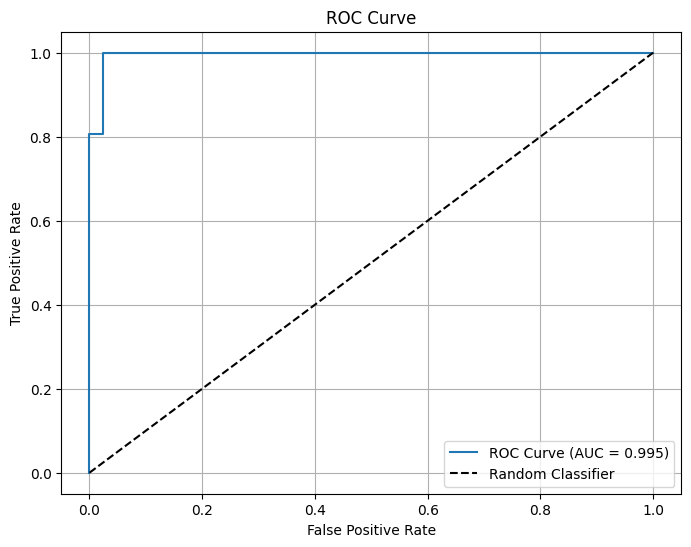

In [19]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_c, y_prob_c)
auc = roc_auc_score(y_test_c, y_prob_c)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### Regression Metrics

In [20]:
def calculate_regression_metrics(
    y_true: np.ndarray,
    y_pred: np.ndarray
) -> Dict[str, float]:
    """Calculate regression metrics.
    
    Args:
        y_true: True values.
        y_pred: Predicted values.
    
    Returns:
        Dictionary of metric names and values.
    """
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2 Score': r2_score(y_true, y_pred)
    }


reg_metrics = calculate_regression_metrics(y_test_reg, y_pred_lin)  # type: ignore[arg-type]
for metric, value in reg_metrics.items():
    print(f"{metric}: {value:.4f}")

MAE: 42.7941
MSE: 2900.1936
RMSE: 53.8534
R2 Score: 0.4526


**Metric Explanations:**

- **MAE (Mean Absolute Error)**: Average of absolute differences. Easy to interpret.
- **MSE (Mean Squared Error)**: Average of squared differences. Penalises larger errors more.
- **RMSE (Root Mean Squared Error)**: Square root of MSE. Same units as target variable.
- **R2 Score**: Proportion of variance explained by the model. 1 = perfect, 0 = baseline.

## 6. Confusion Matrix Interpretation

A confusion matrix shows the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

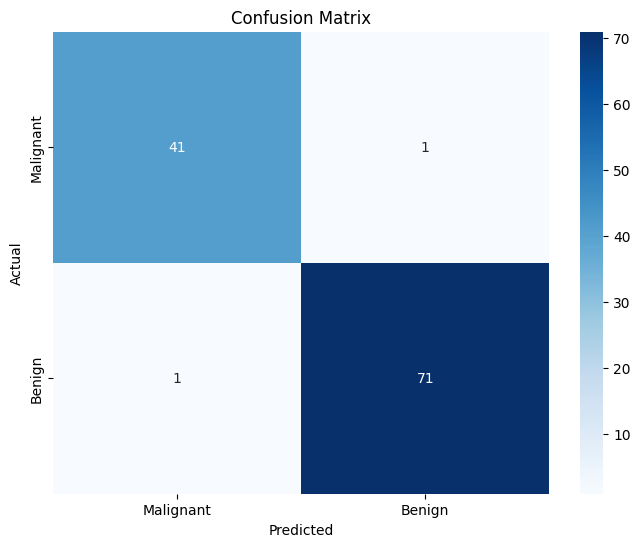

In [21]:
def plot_confusion_matrix(
    y_true: np.ndarray,
    y_pred: np.ndarray,
    labels: List[str] | None = None
) -> None:
    """Plot a confusion matrix heatmap.
    
    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        labels: Class labels for display.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    if labels is not None:
        sns.heatmap(
            cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels
        )
    else:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(y_test_c, y_pred_c, labels=['Malignant', 'Benign'])  # type: ignore[arg-type]

In [22]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c, target_names=['Malignant', 'Benign']))

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



**Reading the Confusion Matrix:**

```
                  Predicted
              Negative  Positive
Actual  Neg     TN        FP
        Pos     FN        TP
```

- **True Positives (TP)**: Correctly predicted positive
- **True Negatives (TN)**: Correctly predicted negative
- **False Positives (FP)**: Incorrectly predicted positive (Type I error)
- **False Negatives (FN)**: Incorrectly predicted negative (Type II error)

## 7. Feature Scaling

Feature scaling is crucial for algorithms that are distance-based (KNN, SVM) or gradient-based (neural networks, logistic regression).

### 7.1 StandardScaler (Z-score normalisation)

Transforms features to have mean=0 and standard deviation=1.

Formula: z = (x - mean) / std

In [23]:
def apply_standard_scaling(
    X_train: np.ndarray,
    X_test: np.ndarray
) -> tuple[np.ndarray, np.ndarray, StandardScaler]:
    """Apply standard scaling to features.
    
    Args:
        X_train: Training features.
        X_test: Test features.
    
    Returns:
        Tuple of (scaled training data, scaled test data, fitted scaler).
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler  # type: ignore[return-value]


X_train_std, X_test_std, std_scaler = apply_standard_scaling(X_train, X_test)

print("Before StandardScaler:")
print(f"  Mean: {X_train.mean(axis=0).round(2)}")
print(f"  Std: {X_train.std(axis=0).round(2)}")

print("\nAfter StandardScaler:")
print(f"  Mean: {X_train_std.mean(axis=0).round(2)}")
print(f"  Std: {X_train_std.std(axis=0).round(2)}")

Before StandardScaler:
  Mean: [5.84 3.05 3.77 1.2 ]
  Std: [0.84 0.45 1.76 0.76]

After StandardScaler:
  Mean: [-0. -0.  0.  0.]
  Std: [1. 1. 1. 1.]


### 7.2 MinMaxScaler

Scales features to a fixed range, typically [0, 1].

Formula: x_scaled = (x - min) / (max - min)

In [24]:
def apply_minmax_scaling(
    X_train: np.ndarray,
    X_test: np.ndarray,
    feature_range: tuple[int, int] = (0, 1)
) -> tuple[np.ndarray, np.ndarray, MinMaxScaler]:
    """Apply min-max scaling to features.
    
    Args:
        X_train: Training features.
        X_test: Test features.
        feature_range: Desired range of scaled features.
    
    Returns:
        Tuple of (scaled training data, scaled test data, fitted scaler).
    """
    scaler = MinMaxScaler(feature_range=feature_range)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler  # type: ignore[return-value]


X_train_mm, X_test_mm, mm_scaler = apply_minmax_scaling(X_train, X_test)

print("Before MinMaxScaler:")
print(f"  Min: {X_train.min(axis=0).round(2)}")
print(f"  Max: {X_train.max(axis=0).round(2)}")

print("\nAfter MinMaxScaler:")
print(f"  Min: {X_train_mm.min(axis=0).round(2)}")
print(f"  Max: {X_train_mm.max(axis=0).round(2)}")

Before MinMaxScaler:
  Min: [4.3 2.  1.1 0.1]
  Max: [7.9 4.4 6.9 2.5]

After MinMaxScaler:
  Min: [0. 0. 0. 0.]
  Max: [1. 1. 1. 1.]


**When to use which scaler?**

- **StandardScaler**: When features follow a roughly Gaussian distribution. Good default choice.
- **MinMaxScaler**: When you need bounded values (e.g., neural networks with bounded activations). Sensitive to outliers.

## 8. Feature Selection Techniques

Feature selection helps reduce dimensionality, improve model performance, and reduce overfitting.

### 8.1 SelectKBest (Filter Method)

Selects the K highest-scoring features based on a statistical test.

In [25]:
def select_k_best_features(
    X: np.ndarray,
    y: np.ndarray,
    k: int = 5,
    score_func: Any = f_classif
) -> tuple[np.ndarray, SelectKBest]:
    """Select K best features using statistical test.
    
    Args:
        X: Feature matrix.
        y: Target vector.
        k: Number of features to select.
        score_func: Scoring function.
    
    Returns:
        Tuple of (selected features, fitted selector).
    """
    selector = SelectKBest(score_func=score_func, k=k)
    X_selected = selector.fit_transform(X, y)
    return X_selected, selector  # type: ignore[return-value]


X_selected, selector = select_k_best_features(X, y, k=2)

print(f"Original shape: {X.shape}")
print(f"Selected shape: {X_selected.shape}")
print(f"Feature scores: {dict(zip(iris.feature_names, selector.scores_.round(2)))}")  # type: ignore[union-attr]
print(f"Selected features: {np.array(iris.feature_names)[selector.get_support()]}")  # type: ignore[union-attr]

Original shape: (150, 4)
Selected shape: (150, 2)
Feature scores: {'sepal length (cm)': np.float64(119.26), 'sepal width (cm)': np.float64(49.16), 'petal length (cm)': np.float64(1180.16), 'petal width (cm)': np.float64(960.01)}
Selected features: ['petal length (cm)' 'petal width (cm)']


### 8.2 Recursive Feature Elimination (RFE)

Recursively removes least important features based on model coefficients/importances.

In [26]:
def recursive_feature_elimination(
    X: np.ndarray,
    y: np.ndarray,
    n_features_to_select: int = 2,
    estimator: Any = None
) -> tuple[np.ndarray, RFE]:
    """Perform recursive feature elimination.
    
    Args:
        X: Feature matrix.
        y: Target vector.
        n_features_to_select: Number of features to select.
        estimator: Base estimator (default: LogisticRegression).
    
    Returns:
        Tuple of (selected features, fitted RFE object).
    """
    if estimator is None:
        estimator = LogisticRegression(max_iter=1000)
    
    rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)
    X_selected = rfe.fit_transform(X, y)
    return X_selected, rfe  # type: ignore[return-value]


X_rfe, rfe = recursive_feature_elimination(X, y, n_features_to_select=2)

print(f"Feature ranking: {dict(zip(iris.feature_names, rfe.ranking_))}")  # type: ignore[union-attr]
print(f"Selected features: {np.array(iris.feature_names)[rfe.support_]}")  # type: ignore[union-attr]

Feature ranking: {'sepal length (cm)': np.int64(3), 'sepal width (cm)': np.int64(2), 'petal length (cm)': np.int64(1), 'petal width (cm)': np.int64(1)}
Selected features: ['petal length (cm)' 'petal width (cm)']


### 8.3 SelectFromModel (Embedded Method)

Selects features based on importance weights from a fitted model.

In [27]:
def select_from_model(
    X: np.ndarray,
    y: np.ndarray,
    threshold: str = 'mean'
) -> tuple[np.ndarray, SelectFromModel]:
    """Select features using model-based importance.
    
    Args:
        X: Feature matrix.
        y: Target vector.
        threshold: Threshold for feature selection.
    
    Returns:
        Tuple of (selected features, fitted selector).
    """
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    
    selector = SelectFromModel(rf, threshold=threshold, prefit=True)
    X_selected = selector.transform(X)
    return X_selected, selector  # type: ignore[return-value]


X_sfm, sfm_selector = select_from_model(X, y)

print(f"Original shape: {X.shape}")
print(f"Selected shape: {X_sfm.shape}")
print(f"Selected features: {np.array(iris.feature_names)[sfm_selector.get_support()]}")  # type: ignore[union-attr]

Original shape: (150, 4)
Selected shape: (150, 2)
Selected features: ['petal length (cm)' 'petal width (cm)']


## 9. Hyperparameter Tuning

Hyperparameters are parameters set before training (e.g., learning rate, number of trees). Tuning finds optimal values.

### 9.1 GridSearchCV

Exhaustively searches over all combinations of specified hyperparameters.

In [28]:
def grid_search_cv(
    X: np.ndarray,
    y: np.ndarray,
    estimator: Any,
    param_grid: Dict[str, List],
    cv: int = 5
) -> GridSearchCV:
    """Perform grid search cross-validation.
    
    Args:
        X: Feature matrix.
        y: Target vector.
        estimator: Model to tune.
        param_grid: Dictionary of parameters to search.
        cv: Number of cross-validation folds.
    
    Returns:
        Fitted GridSearchCV object.
    """
    grid_search = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X, y)
    return grid_search


# Example: Tune KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = grid_search_cv(X_train_scaled, y_train, KNeighborsClassifier(), param_grid)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validation score: 0.9667


### 9.2 RandomizedSearchCV

Samples a fixed number of parameter combinations from specified distributions. More efficient than grid search for large parameter spaces.

In [29]:
from scipy.stats import randint


def randomized_search_cv(
    X: np.ndarray,
    y: np.ndarray,
    estimator: Any,
    param_distributions: Dict[str, Any],
    n_iter: int = 20,
    cv: int = 5
) -> RandomizedSearchCV:
    """Perform randomised search cross-validation.
    
    Args:
        X: Feature matrix.
        y: Target vector.
        estimator: Model to tune.
        param_distributions: Dictionary of parameter distributions.
        n_iter: Number of parameter settings sampled.
        cv: Number of cross-validation folds.
    
    Returns:
        Fitted RandomizedSearchCV object.
    """
    random_search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=param_distributions,
        n_iter=n_iter,
        cv=cv,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )
    random_search.fit(X, y)
    return random_search


# Example: Tune Random Forest
param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

random_search = randomized_search_cv(
    X_train, y_train,
    RandomForestClassifier(random_state=42),
    param_distributions,
    n_iter=20
)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")

Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 87}
Best cross-validation score: 0.9500


## 10. Pipelines in Scikit-Learn

Pipelines chain multiple processing steps into a single estimator. Benefits:
- Cleaner code
- Prevents data leakage during cross-validation
- Easy deployment

In [30]:
def create_classification_pipeline(
    scaler: Any = StandardScaler(),
    classifier: Any = LogisticRegression(max_iter=1000)
) -> Pipeline:
    """Create a classification pipeline with scaling and classifier.
    
    Args:
        scaler: Feature scaler.
        classifier: Classification model.
    
    Returns:
        Scikit-learn Pipeline object.
    """
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
    ])
    return pipeline


# Create and train pipeline
pipeline = create_classification_pipeline(
    scaler=StandardScaler(),
    classifier=SVC(kernel='rbf', random_state=42)
)

pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)

print(f"Pipeline Accuracy: {accuracy_score(y_test, y_pred_pipe):.4f}")

Pipeline Accuracy: 0.9667


In [31]:
# Pipeline with feature selection
pipeline_with_selection = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k=3)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_with_selection.fit(X_train, y_train)
y_pred_pipe2 = pipeline_with_selection.predict(X_test)

print(f"Pipeline with Feature Selection Accuracy: {accuracy_score(y_test, y_pred_pipe2):.4f}")

Pipeline with Feature Selection Accuracy: 0.9000


In [32]:
# GridSearchCV with Pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])

param_grid_pipe = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

grid_pipe = GridSearchCV(pipe, param_grid_pipe, cv=5, scoring='accuracy')
grid_pipe.fit(X_train, y_train)

print(f"Best parameters: {grid_pipe.best_params_}")
print(f"Best CV score: {grid_pipe.best_score_:.4f}")
print(f"Test accuracy: {grid_pipe.score(X_test, y_test):.4f}")

Best parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Best CV score: 0.9750
Test accuracy: 0.9333


## 11. Handling Imbalanced Datasets

Imbalanced datasets have significantly more samples of one class than others. This can bias models towards the majority class.

In [33]:
# Create an imbalanced dataset
X_imb, y_imb = make_classification(
    n_samples=1000, n_features=20, n_informative=10,
    n_redundant=5, n_clusters_per_class=1,
    weights=[0.9, 0.1], flip_y=0, random_state=42
)

print(f"Class distribution: {np.bincount(y_imb)}")
print(f"Class 0: {np.sum(y_imb==0)} ({np.sum(y_imb==0)/len(y_imb)*100:.1f}%)")
print(f"Class 1: {np.sum(y_imb==1)} ({np.sum(y_imb==1)/len(y_imb)*100:.1f}%)")

Class distribution: [900 100]
Class 0: 900 (90.0%)
Class 1: 100 (10.0%)


### Techniques for Handling Imbalanced Data

1. **Class Weights**: Assign higher weights to minority class
2. **Resampling**: Over-sample minority or under-sample majority
3. **Use appropriate metrics**: F1, precision, recall instead of accuracy

In [34]:
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.2, random_state=42, stratify=y_imb
)

# Without class weights
clf_no_weights = LogisticRegression(max_iter=1000)
clf_no_weights.fit(X_train_imb, y_train_imb)
y_pred_no_weights = clf_no_weights.predict(X_test_imb)

# With class weights
clf_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
clf_balanced.fit(X_train_imb, y_train_imb)
y_pred_balanced = clf_balanced.predict(X_test_imb)

print("Without class weights:")
print(f"  Accuracy: {accuracy_score(y_test_imb, y_pred_no_weights):.4f}")
print(f"  F1 Score: {f1_score(y_test_imb, y_pred_no_weights):.4f}")
print(f"  Recall (minority): {recall_score(y_test_imb, y_pred_no_weights):.4f}")

print("\nWith class weights (balanced):")
print(f"  Accuracy: {accuracy_score(y_test_imb, y_pred_balanced):.4f}")
print(f"  F1 Score: {f1_score(y_test_imb, y_pred_balanced):.4f}")
print(f"  Recall (minority): {recall_score(y_test_imb, y_pred_balanced):.4f}")

Without class weights:
  Accuracy: 0.9750
  F1 Score: 0.8571
  Recall (minority): 0.7500

With class weights (balanced):
  Accuracy: 0.9750
  F1 Score: 0.8718
  Recall (minority): 0.8500


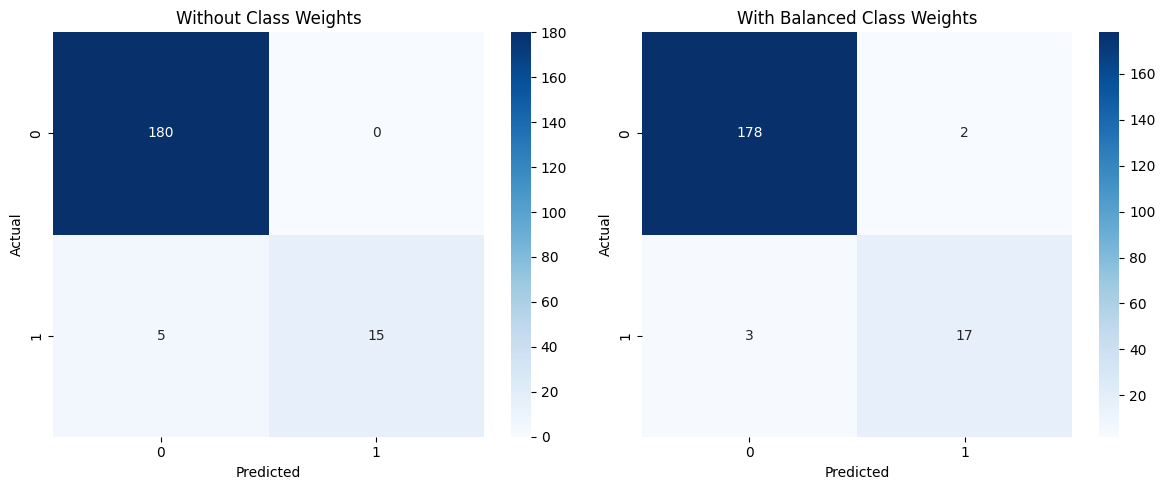

In [35]:
# Comparison with confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, y_pred, title in zip(
    axes,
    [y_pred_no_weights, y_pred_balanced],
    ['Without Class Weights', 'With Balanced Class Weights']
):
    cm = confusion_matrix(y_test_imb, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

plt.tight_layout()
plt.show()

## 12. Overfitting and Underfitting

- **Overfitting**: Model learns training data too well, including noise. High training accuracy, low test accuracy.
- **Underfitting**: Model is too simple to capture patterns. Low accuracy on both training and test data.

In [36]:
def demonstrate_fitting_issues(
    X_train: np.ndarray,
    X_test: np.ndarray,
    y_train: np.ndarray,
    y_test: np.ndarray
) -> pd.DataFrame:
    """Demonstrate overfitting and underfitting with Decision Trees.
    
    Args:
        X_train: Training features.
        X_test: Test features.
        y_train: Training labels.
        y_test: Test labels.
    
    Returns:
        DataFrame with training and test scores for different model complexities.
    """
    results = []
    
    for max_depth in [1, 2, 3, 5, 10, 20, None]:
        dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        dt.fit(X_train, y_train)
        
        train_score = dt.score(X_train, y_train)
        test_score = dt.score(X_test, y_test)
        
        results.append({
            'max_depth': str(max_depth),
            'train_accuracy': train_score,
            'test_accuracy': test_score,
            'gap': train_score - test_score
        })
    
    return pd.DataFrame(results)


fitting_results = demonstrate_fitting_issues(X_train, X_test, y_train, y_test)
print(fitting_results.to_string(index=False))

max_depth  train_accuracy  test_accuracy      gap
        1        0.666667       0.666667 0.000000
        2        0.966667       0.933333 0.033333
        3        0.983333       0.966667 0.016667
        5        1.000000       0.933333 0.066667
       10        1.000000       0.933333 0.066667
       20        1.000000       0.933333 0.066667
     None        1.000000       0.933333 0.066667


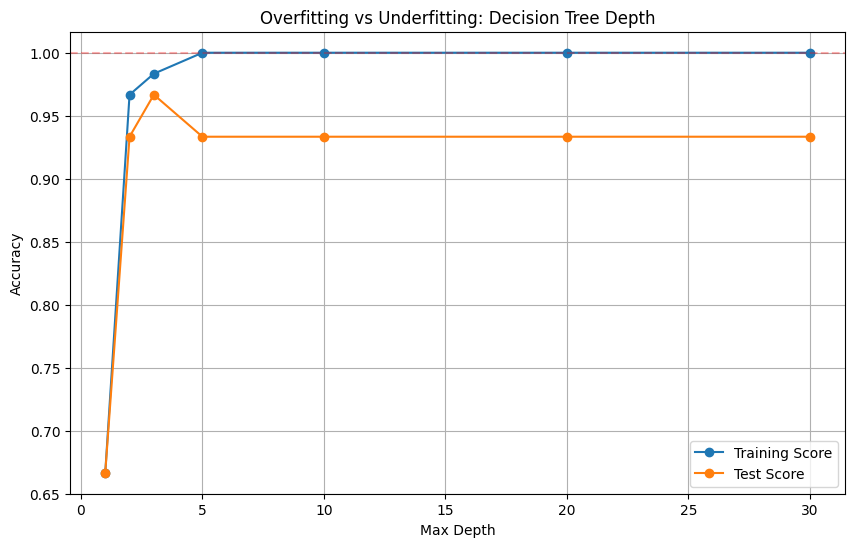

In [37]:
# Visualise overfitting/underfitting
depths = [1, 2, 3, 5, 10, 20, 30]
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training Score')
plt.plot(depths, test_scores, 'o-', label='Test Score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting vs Underfitting: Decision Tree Depth')
plt.legend()
plt.grid(True)
plt.axhline(y=1.0, color='r', linestyle='--', alpha=0.3)
plt.show()

**Solutions to Overfitting:**
- Use regularisation (L1/L2)
- Reduce model complexity
- Get more training data
- Feature selection
- Cross-validation
- Early stopping
- Dropout (for neural networks)

**Solutions to Underfitting:**
- Use more complex model
- Add more features
- Reduce regularisation
- Increase training time

---

## 13. Practice Questions

Test your understanding with the following exercises. Try to solve them before revealing the answers!

### Question 1: Train/Test Split

Load the wine dataset from sklearn, split it into training (80%) and test (20%) sets with stratification, and print the class distribution in both sets.

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np

# Load the wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Split with stratification
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42, stratify=y_wine
)

print(f"Training set size: {len(X_train_w)}")
print(f"Test set size: {len(X_test_w)}")
print(f"\nTraining class distribution: {np.bincount(y_train_w)}")
print(f"Test class distribution: {np.bincount(y_test_w)}")
```

</details>

### Question 2: Cross-Validation

Perform 5-fold cross-validation on the Iris dataset using a Random Forest classifier with 50 trees. Print the mean and standard deviation of the accuracy scores.

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Load data
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Create model
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf, X_iris, y_iris, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")
print(f"Standard deviation: {scores.std():.4f}")
```

</details>

### Question 3: KNN Classification

Train a KNN classifier on the breast cancer dataset with k=7 and distance-weighted voting. Remember to scale the features. Report the accuracy, precision, and recall.

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load data
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

# Split data
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bc)
X_test_scaled = scaler.transform(X_test_bc)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train_scaled, y_train_bc)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test_bc, y_pred):.4f}")
print(f"Precision: {precision_score(y_test_bc, y_pred):.4f}")
print(f"Recall: {recall_score(y_test_bc, y_pred):.4f}")
```

</details>

### Question 4: Decision Tree with Pruning

Train a Decision Tree on the Iris dataset with max_depth=3 and min_samples_leaf=5. Visualise the feature importances as a bar chart.

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Train Decision Tree with pruning
dt = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)
dt.fit(X_iris, y_iris)

# Plot feature importances
importances = dt.feature_importances_
feature_names = iris.feature_names

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()

print(f"Training accuracy: {dt.score(X_iris, y_iris):.4f}")
```

</details>

### Question 5: Ridge vs Lasso Regression

Using the diabetes dataset, compare Ridge and Lasso regression with alpha=0.5. Print the R2 score and count how many coefficients Lasso sets to zero.

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np

# Load data
diabetes = load_diabetes()
X_diab, y_diab = diabetes.data, diabetes.target

# Split data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_diab, y_diab, test_size=0.2, random_state=42
)

# Train Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_d, y_train_d)
y_pred_ridge = ridge.predict(X_test_d)

# Train Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_d, y_train_d)
y_pred_lasso = lasso.predict(X_test_d)

print("Ridge Regression:")
print(f"  R2 Score: {r2_score(y_test_d, y_pred_ridge):.4f}")
print(f"  Non-zero coefficients: {np.sum(ridge.coef_ != 0)}")

print("\nLasso Regression:")
print(f"  R2 Score: {r2_score(y_test_d, y_pred_lasso):.4f}")
print(f"  Non-zero coefficients: {np.sum(lasso.coef_ != 0)}")
print(f"  Zero coefficients: {np.sum(lasso.coef_ == 0)}")
```

</details>

### Question 6: Complete Pipeline

Create a pipeline that:
1. Scales features with StandardScaler
2. Selects the top 10 features with SelectKBest
3. Classifies with SVM (RBF kernel)

Apply this pipeline to the breast cancer dataset and report the accuracy.

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
cancer = load_breast_cancer()
X_bc, y_bc = cancer.data, cancer.target

# Split data
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42, stratify=y_bc
)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', SVC(kernel='rbf', random_state=42))
])

# Train and evaluate
pipeline.fit(X_train_p, y_train_p)
y_pred_p = pipeline.predict(X_test_p)

print(f"Pipeline Accuracy: {accuracy_score(y_test_p, y_pred_p):.4f}")
```

</details>

### Question 7: GridSearchCV

Use GridSearchCV to find the best hyperparameters for a Random Forest on the wine dataset. Search over:
- n_estimators: [50, 100, 150]
- max_depth: [5, 10, None]
- min_samples_split: [2, 5, 10]

Report the best parameters and best cross-validation score.

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Load data
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Split data
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Create and run GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train_g, y_train_g)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")
print(f"Test accuracy: {grid_search.score(X_test_g, y_test_g):.4f}")
```

</details>

### Question 8: Confusion Matrix Analysis

Train a Logistic Regression model on the breast cancer dataset. Create a confusion matrix and calculate precision, recall, and F1-score manually from the matrix values (TP, TN, FP, FN).

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load and prepare data
cancer = load_breast_cancer()
X_cm, y_cm = cancer.data, cancer.target

X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(
    X_cm, y_cm, test_size=0.2, random_state=42, stratify=y_cm
)

# Scale and train
scaler = StandardScaler()
X_train_cm_s = scaler.fit_transform(X_train_cm)
X_test_cm_s = scaler.transform(X_test_cm)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_cm_s, y_train_cm)
y_pred_cm = lr.predict(X_test_cm_s)

# Get confusion matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
print(f"Confusion Matrix:\n{cm}")

# Extract values
TN, FP, FN, TP = cm.ravel()
print(f"\nTN={TN}, FP={FP}, FN={FN}, TP={TP}")

# Calculate metrics manually
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"\nManually calculated:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
```

</details>

### Question 9: Handling Imbalanced Data

Create an imbalanced dataset using make_classification with 95% majority class. Train two Random Forest models - one without class weights and one with balanced class weights. Compare their F1 scores on the minority class.

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import numpy as np

# Create imbalanced dataset
X_imb, y_imb = make_classification(
    n_samples=2000, n_features=20, n_informative=10,
    weights=[0.95, 0.05], flip_y=0, random_state=42
)

print(f"Class distribution: {np.bincount(y_imb)}")

# Split data
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_imb, y_imb, test_size=0.2, random_state=42, stratify=y_imb
)

# Without class weights
rf_no_weights = RandomForestClassifier(n_estimators=100, random_state=42)
rf_no_weights.fit(X_train_i, y_train_i)
y_pred_no = rf_no_weights.predict(X_test_i)

# With balanced class weights
rf_balanced = RandomForestClassifier(
    n_estimators=100, class_weight='balanced', random_state=42
)
rf_balanced.fit(X_train_i, y_train_i)
y_pred_bal = rf_balanced.predict(X_test_i)

print("\nWithout class weights:")
print(f"F1 Score (minority class): {f1_score(y_test_i, y_pred_no, pos_label=1):.4f}")

print("\nWith balanced class weights:")
print(f"F1 Score (minority class): {f1_score(y_test_i, y_pred_bal, pos_label=1):.4f}")
```

</details>

### Question 10: Complete ML Workflow

Implement a complete machine learning workflow for the wine dataset:
1. Load and split data (80/20)
2. Create a pipeline with StandardScaler and SVM
3. Use GridSearchCV to tune C (0.1, 1, 10) and kernel ('linear', 'rbf')
4. Evaluate on test set with accuracy and classification report

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load and split data
wine = load_wine()
X_w, y_w = wine.data, wine.target

X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
    X_w, y_w, test_size=0.2, random_state=42, stratify=y_w
)

# Step 2: Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

# Step 3: GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(
    pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1
)
grid_search.fit(X_train_w, y_train_w)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Step 4: Evaluate on test set
y_pred_w = grid_search.predict(X_test_w)

print(f"\nTest Accuracy: {accuracy_score(y_test_w, y_pred_w):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test_w, y_pred_w, target_names=wine.target_names))
```

</details>

### Question 11: ROC Curve

Train a Logistic Regression model on the breast cancer dataset. Plot the ROC curve and calculate the AUC score.

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load and prepare data
cancer = load_breast_cancer()
X_roc, y_roc = cancer.data, cancer.target

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_roc, y_roc, test_size=0.2, random_state=42, stratify=y_roc
)

# Scale and train
scaler = StandardScaler()
X_train_r_s = scaler.fit_transform(X_train_r)
X_test_r_s = scaler.transform(X_test_r)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_r_s, y_train_r)

# Get probabilities
y_prob = lr.predict_proba(X_test_r_s)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_r, y_prob)
auc = roc_auc_score(y_test_r, y_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Breast Cancer Classification')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC Score: {auc:.4f}")
```

</details>

### Question 12: Comparing Multiple Models

Compare the performance of KNN, Logistic Regression, Decision Tree, Random Forest, and SVM on the Iris dataset using 5-fold cross-validation. Display results in a pandas DataFrame sorted by mean accuracy.

In [ ]:
# Your solution here

<details>
<summary>Click to reveal answer</summary>

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import pandas as pd

# Load data
iris = load_iris()
X_comp, y_comp = iris.data, iris.target

# Define models with pipelines (for scaling)
models = {
    'KNN': Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
    'Logistic Regression': Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))]),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': Pipeline([('scaler', StandardScaler()), ('clf', SVC(random_state=42))])
}

# Compare models
results = []
for name, model in models.items():
    scores = cross_val_score(model, X_comp, y_comp, cv=5, scoring='accuracy')
    results.append({
        'Model': name,
        'Mean Accuracy': scores.mean(),
        'Std Deviation': scores.std()
    })

# Create and display DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Mean Accuracy', ascending=False)
results_df['Mean Accuracy'] = results_df['Mean Accuracy'].round(4)
results_df['Std Deviation'] = results_df['Std Deviation'].round(4)

print(results_df.to_string(index=False))
```

</details>

---

## Summary

This notebook covered the essential scikit-learn concepts for data science assessments:

1. **Data Splitting**: train_test_split with stratification, cross-validation
2. **Classification**: KNN, Logistic Regression, Decision Trees, Random Forest, SVM
3. **Regression**: Linear, Ridge (L2), Lasso (L1)
4. **Metrics**: Accuracy, Precision, Recall, F1, ROC-AUC, RMSE, MAE, R2
5. **Feature Scaling**: StandardScaler, MinMaxScaler
6. **Feature Selection**: SelectKBest, RFE, SelectFromModel
7. **Hyperparameter Tuning**: GridSearchCV, RandomizedSearchCV
8. **Pipelines**: Chaining preprocessing and models
9. **Imbalanced Data**: Class weights, appropriate metrics
10. **Overfitting/Underfitting**: Recognition and solutions

**Key Interview Tips:**
- Always split data before any preprocessing to prevent data leakage
- Use pipelines for clean, reproducible workflows
- Choose metrics appropriate for your problem (e.g., F1 for imbalanced data)
- Understand the trade-offs between different algorithms
- Know when to use regularisation and which type (L1 vs L2)